**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

In [10]:
FIRST_NAME = "Adam"
LAST_NAME = "Nur"
STUDENT_ID = "801286783"

# Neural Networks


### ITCS 5156
### Minwoo "Jake" Lee

## Goal
The goal of this week's lab is to introduce you to neural networks along with related concepts that you can see in the agenda given below.

## Agenda

- Gradient Descent
- Multi-Layer Perceptron (MLP)
- Classification using MLP
- Regression using MLP



## TODO List

1. [TODO1 (5 points)](#TODO1)
2. [TODO2 (5 points)](#TODO2)
3. [TODO3 (10 points)](#TODO3)
4. [TODO4 (5 points)](#TODO4)  
5. [TODO5 (10 points)](#TODO5)
6. [TODO6 (5 points)](#TODO6)
7. [TODO7 (6 points)](#TODO7)
8. [TODO8 (10 points)](#TODO8)
9. [TODO9 (2 points)](#TODO9)
10. [TODO10 (10 points)](#TODO10)
10. [TODO11 (5 points)](#TODO11)
10. [TODO12 (14 points)](#TODO12)
10. [TODO13 (10 points)](#TODO13)
11. [Feedback (3 points)](#feedback)


## Imports

Lets import the required packages first.

In [11]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn
import torch

# Gradient Descent with a Single Point

Let's start off simple and review the concept of gradient descent by looking at a toy problem.


Below we can see a toy example of gradient descent in action. Given some x-y coordinate starting point on a function, in particular $f(x) = x^2$, we want to find the minimum. To do so, we can simply use the idea of gradient descent to slowly move from our starting x-y position to the minimum of the $f(x)$. Since the function is essentially just a bowl the minimum will be at 0.


Remember from calculus class that we could directly solve for the minimum by taking the derivative of our function and setting it equal to $f'(x) = 0$ and then solve for $x$! For more complex functions (like neural networks) computing the minimum by hand just is not possible. This is why we need gradient descent in order to approximate the minimum instead!

Further we define a helper plotting function called `plot_function()` which will plot any passed mathematical function. Additionally, we also define our function as `f()` that we will be using in our gradient descent toy problem.

In [12]:
# plot_function
#   visualize the gradient update progress over the function f
#
#  parameters
#  ----------
#   f               function to optimize
#   steps           the number of steps
#   tx, ty, title   x label, y label, and title of the plot
#   min_ls, max_ls  min and max range of x
#
def plot_function(f, steps=100, tx=None, ty=None, title=None, min_ls=-2, max_ls=2, ax=None, figsize=(6,4)):
    x = torch.linspace(min_ls, max_ls,steps)
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None:
        ax.set_xlabel(tx)
    if ty is not None:
        ax.set_ylabel(ty)
    if title is not None:
        ax.set_title(title)

# define function f to play with for the practice
def f(x):
    return x**2

### TODO 1 (5 points)

- Use our `plot_function()` function to plot our $x^2$ function `f()`.

- Set the axis labels as 'X' and 'Y' using tx and ty.

- Next, plot the starting point of our gradient descent problem using `x_start` and `y_start`.

- Assign `x_start` as 1 and compute y_start by passing `x_start` to `f()` and store it in `y_start`.

- Plot the starting point and represent it by a green dot.

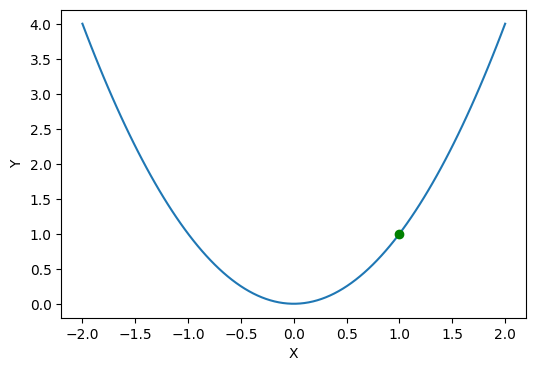

In [13]:
# TODO 1
plot_function(f, tx='X', ty='Y')

x_start = 1
y_start = f(torch.tensor(x_start))

plt.plot(x_start, y_start, 'go')
plt.show()

Alright, we have our function and our starting point plotted! Now we just need to define our gradient descent algorithm. We do so by defining a `gradient_descent()` function with computes the gradient by using PyTorchs automatic differentiation engine!

There is a lot going on in this code. A deep explanation of all parts of this code is out of scope for this lab but let's cover the basics as we'll be simplifying and abstracting away many aspects of this code as the lab goes on. We have left some comments in the code for those that are curious about what is happening, but a high-level understanding will suffice for now.

All the below code is doing is performing gradient descent for some number of pre-defined steps or epochs defined by `n_iter`. This means that given our start position `start_x`,  a function `f`, and a learning rate `lr`, gradient descent will try to find the minimum of the function given, starting from the passed start position, by taking small steps. Remember the size of a step is determined by the learning rate `lr`.


The important aspects of the code are:
> `yt.backward()`
> - This line computes the derivative or gradient of our $x^2$ function.

> `xt.data = xt - (lr * xt.grad)`
> - Equation for taking a gradient step. This equations moves our x-coordinate closer to the minimum by using the computed gradient `xt.grad`. We apply the learning rate `lr` to scale the gradient down in order to take small steps and not overshoot the minimum!  
> - Note the gradient descent step formula is defined as $x = x - \alpha \nabla f(x)$ where $\nabla f(x)$ is the gradient of the selected function, $\alpha$ is the learning rate and $x$ is the x-coordinate.

NOTE: The following function is implemented using Pytorch, which we will learn next week. Thus, you don't need to worry about it too much. Just try to understand the flow of the code, not specific methods that we used here. You can see how the gradient is computed and then the weights are updated iteratively in a loop with a preset learning rate.

In [14]:
def gradient_descent(x, f, n_iter=10, lr=.1):

    # Put x in a tensor
    # The requires_grad parameter means we will take the
    # gradient with respect to x. Thus any computations
    # preformed on x will be tracked!
    xt = torch.tensor(float(x), requires_grad=True)

    # Calculate the y coordiante and put it in a tensor.
    # Since xt used the requires_grad parameter and is used to
    # compute yt PyTorch has tracked the function f() and
    # will know to take the gradient with respect to function f().
    yt = f(xt)
    y = yt.detach().item()

    x_hist = [x]
    y_hist = [y]

    for i in range(n_iter):
        # PyTorch method for computing the derivative of a tensor.
        # Since our tensor yt is calculated by a function, PyTorch tracked this
        # calculation and knows how to differeitiate it!
        # This is the same as loss.backward() in PyTorch!
        yt.backward()

        print("(x, y): ({:.3f}, {:.3f}), Grad: {:.4f}, Scaled-grad: {:.4f}".format(
             xt.item(), yt.item(), xt.grad.item(), xt.grad.item()*lr)
             )

        # Take a gradient descent step.
        # Store new xt in xt.data so PyTorch
        # does not track this operation as an
        # operation that needs to be differentiated
        # This is the same as optim.step() in PyTorch!
        xt.data = xt - (lr * xt.grad)
        # Figureout what our y-coordiante is after
        # taking the gradient step
        yt = f(xt)

        # Get the x and y positions from tensors
        x = xt.detach().item()
        y = yt.detach().item()

        # x and y position history
        x_hist.append(x)
        y_hist.append(y)

        # Convergence check to see if gradient is near zero!
        # In other words, check if gradient is near a minimum!
        # Recall that when the gradient equals zero we are either
        # near a local minimum, local maximum, or saddle point!
        if abs(xt.grad.item()) <= .001:
            break
        # Reset gradients to zero otherwise PyTorch will
        # sum the gradients if xt.grad != 0!
        xt.grad.zero_()

    print("Total iterations taken: {}".format(i))
    return x_hist, y_hist

### TODO 2 (5 points)

1. Specify a learning rate `lr`, the number of gradient steps to take `n_iter`, and the x-coordinate start position `start_x` as 0.1, 20, 1 respectively.
2. Call the `gradient_descent()` and pass to it the `x_start`, the $x^2$ function `f`, the number of gradient descent steps to take `n_iter`, and the learning rate `lr`.Store the output into `x_hist` and `y_hist`.
3. Plot the history of the x-y coordinates by plotting `x_hist` and `y_hist` using the format `ro-`.
4. Similarly, plot the starting and ending positions using `go` and `bo` respectively.

(x, y): (1.000, 1.000), Grad: 2.0000, Scaled-grad: 0.2000
(x, y): (0.800, 0.640), Grad: 1.6000, Scaled-grad: 0.1600
(x, y): (0.640, 0.410), Grad: 1.2800, Scaled-grad: 0.1280
(x, y): (0.512, 0.262), Grad: 1.0240, Scaled-grad: 0.1024
(x, y): (0.410, 0.168), Grad: 0.8192, Scaled-grad: 0.0819
(x, y): (0.328, 0.107), Grad: 0.6554, Scaled-grad: 0.0655
(x, y): (0.262, 0.069), Grad: 0.5243, Scaled-grad: 0.0524
(x, y): (0.210, 0.044), Grad: 0.4194, Scaled-grad: 0.0419
(x, y): (0.168, 0.028), Grad: 0.3355, Scaled-grad: 0.0336
(x, y): (0.134, 0.018), Grad: 0.2684, Scaled-grad: 0.0268
(x, y): (0.107, 0.012), Grad: 0.2147, Scaled-grad: 0.0215
(x, y): (0.086, 0.007), Grad: 0.1718, Scaled-grad: 0.0172
(x, y): (0.069, 0.005), Grad: 0.1374, Scaled-grad: 0.0137
(x, y): (0.055, 0.003), Grad: 0.1100, Scaled-grad: 0.0110
(x, y): (0.044, 0.002), Grad: 0.0880, Scaled-grad: 0.0088
(x, y): (0.035, 0.001), Grad: 0.0704, Scaled-grad: 0.0070
(x, y): (0.028, 0.001), Grad: 0.0563, Scaled-grad: 0.0056
(x, y): (0.023

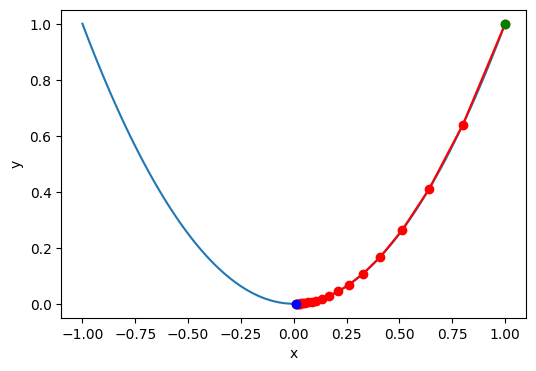

In [15]:
# TODO 2.1
lr = 0.1
n_iter = 20
start_x = 1


# TODO 2.2
x_hist, y_hist = gradient_descent(start_x, f, n_iter=n_iter, lr=lr)


# Plot the our function
plot_function(f, min_ls=-round(max(x_hist)), max_ls=round(max(x_hist)), tx='x', ty='y')

# TODO 2.3
plt.plot(x_hist, y_hist, 'ro-')


# TODO 2.4
plt.plot(x_hist[0], y_hist[0], 'go')
plt.plot(x_hist[-1], y_hist[-1], 'bo')
plt.show()


As we can see, we managed to use gradient descent to slowly move from our initial position, designated by the green dot, all the way down very close to the minimum. Each red dot indicates where we are after taking a gradient step and the blue dot indicates our final position.

Likewise if we look at the output of the `gradient_descent()` function above we can see the exact (x, y) position before taking a gradient step and after (these positions are also stored inside `x_hist` and `y_hist`). Further, we can see the gradient that was computed and the gradient scaled by the learning rate or the gradient step actually taken.

Notice, at first we take very large steps as the gradient is large but as we approach the minimum, it slows down and the steps get smaller and smaller!

# Multi-Layer Perceptron


A Multi-Layer Perceptron (MLP) is a fundamental type of neural networks characterized by multiple layers of interconnected neurons, including an input layer, one or more hidden layers, and an output layer. Each neuron in an MLP is connected to every neuron in the subsequent layer, and each connection is associated with a weight that determines the strength of the connection. MLPs are typically used for supervised learning tasks such as classification and regression. During the training process, the network adjusts the weights of its connections using backpropagation, aiming to minimize the difference between the actual output and the desired output. This iterative optimization process allows MLPs to learn complex patterns and relationships within the input data.

## TODO 3 (10 points)

- Create an MLP using `MLPClassifier` function from `sklearn.neural_network` by considering the following attributes:
  - Solver: SGD
  - Alpha: 1e-5
  - Random State: 1
  - 3 Hidden Layers with sizes from the last three non-zero digits of your Student ID.

- Train the created `MLPClassifier` by using the following:
  - `X`: A 2D array of 0's and 1's. There should be atleast a single 0 and 1 in it.
  - `y`: [0, 1]

- Print the weights of MLP between each pair of consecutive hidden layers using `coefs_` function along with the shape of the weight matrix.
  - Hint: You can use a for loop with `enumerate` function to traverse through multiple layers.
- Comment on the shape of each weight matrix.

In [16]:
# TODO 3
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd', alpha=1e-5, random_state=1, hidden_layer_sizes=(7, 8, 3))

X = np.array([[0, 1], [1, 0]])
y = np.array([0, 1])

mlp.fit(X, y)

for i, (weights, biases) in enumerate(zip(mlp.coefs_, mlp.intercepts_)):
    print(f"Layer {i} to Layer {i+1} weights:")
    print(weights)
    print(f"Shape of weight matrix: {weights.shape}")
    print(f"Biases for Layer {i+1}: {biases}")
    print(f"Shape of bias vector: {biases.shape}")
    print()




Layer 0 to Layer 1 weights:
[[-0.1355012   0.2873606  -0.81630198 -0.32278646 -0.57683968 -0.6657019
  -0.5393866 ]
 [-0.25219586 -0.08559863  0.06338685 -0.13195354  0.30245928 -0.48262282
   0.69254954]]
Shape of weight matrix: (2, 7)
Biases for Layer 1: [-0.77177283  0.28892577 -0.13504069  0.09584009 -0.58724567 -0.4929982
  0.53914984]
Shape of bias vector: (7,)

Layer 1 to Layer 2 weights:
[[ 0.59230356 -0.23599956  0.24326867  0.47609423  0.49913755 -0.52487713
  -0.58304911 -0.41763115]
 [ 0.50082324 -0.51408883 -0.01052276  0.52948138  0.02967308  0.17317397
  -0.23335408  0.24218724]
 [ 0.42326765 -0.60931664  0.31640728  0.61835987  0.31390447 -0.27771616
   0.36590911 -0.501879  ]
 [-0.06590942  0.51683201 -0.26105724 -0.26844275 -0.46797646 -0.60795222
   0.22620887 -0.36476129]
 [-0.29655978 -0.0106591  -0.56495124  0.09375128 -0.44685265  0.11296248
   0.25267414 -0.50300675]
 [-0.10871049  0.24589655 -0.10855455 -0.56926339  0.04540533  0.20718367
   0.01883322  0.56236

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Write your answer about the shape of each weight matrix in the below cell.

`ANSWER:` The Weight matrix shape from Layer 0 to Layer 1 is (2, 7) and the Bias vector shape is (7,).

The Weight matrix shape from Layer 1 to Layer 2 is (7, 8) and the Bias vector shape is (8,).

The Weight matrix shape from Layer 2 to Layer 3 is (8, 3) and the Bias vector shape is (3,).

The Weight matrix shape from Layer 3 to Layer 4 is (3, 1) and the Bias vector shape is (1,).

# Classification using Multi-Layer Perceptron:

## Dataset:

### Wine Quality Dataset

The Wine Quality dataset is a popular benchmark dataset in machine learning and statistics, containing physicochemical properties of red and white variants of the Portuguese "Vinho Verde" wine. It comprises 11 input variables, including attributes like acidity, residual sugar, and alcohol content, along with quality ratings assigned by human experts. These quality ratings range from 0 to 10, reflecting the perceived quality of the wine. Researchers often use this dataset to explore predictive modeling tasks, such as regression to predict wine quality based on its chemical properties or classification to distinguish between high and low-quality wines. Its availability in public repositories like the UCI Machine Learning Repository makes it widely accessible for educational and research purposes in data analysis and machine learning.

You can directly download the file from [here](https://archive.ics.uci.edu/dataset/186/wine+quality).

**Note**: You have to combine both red and white wine quality CSV files for this lab. To avoid any sort of confusion in this, we suggest you to import the dataset directly from `ucimlrepo` library available in Python. Detailed instructions and the necessary code for this process can be seen by clicking the option 'Import in Python' present on the right side in the dataset link given above. You don't need to print the metadata and variable information in this notebook.

Now, let us load the two datasets into memory.

### TODO 4 (5 points)
1. Using Pandas DataFrame, read the csv file and store it into `df_wine`.  
    * Concatenate both the features and target dataframes in case you are importing the dataset from `ucimlrepo` package.
2. Print the data

 - You can refer to the process you've done in Lab-5 to work on the same dataset.

In [17]:
pip install ucimlrepo               # Run this only in case you dont have this library installed

In [18]:
# TODO 4: Wine Quality Dataset
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

df_wine = pd.concat([X, y], axis=1)


df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Visualization
Now it's time to do some quick visualization to see how the data look like.

### TODO 5 (10 points)

1. Add your own plots (at least two) for the wine quality dataset that you think will provide some sort of insight into the data set.
    1. Hint: Refer to prior labs for ideas if needed!


2. State your observations concerning your wine quality plots and why you selected each plot.

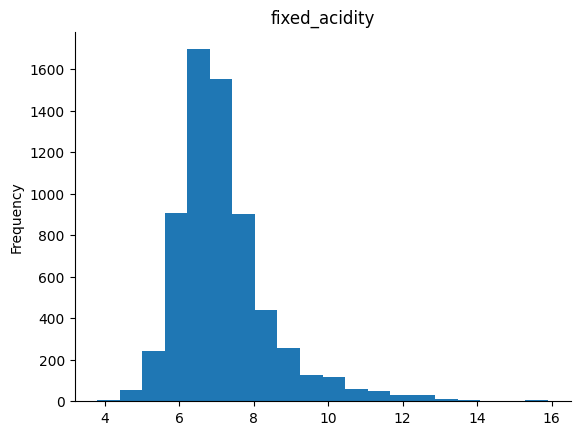

In [19]:
# TODO 5-1: Plot 1
from matplotlib import pyplot as plt
df_wine['fixed_acidity'].plot(kind='hist', bins=20, title='fixed_acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

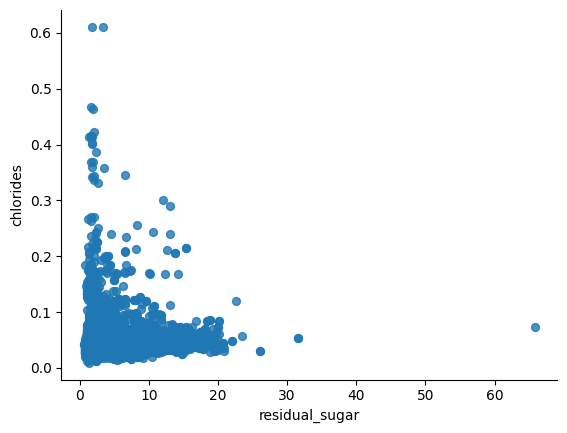

In [20]:
# TODO 5-1: Plot 2


from matplotlib import pyplot as plt
df_wine.plot(kind='scatter', x='residual_sugar', y='chlorides', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


`TODO 5.2` State your observations concerning your wine quality plots and why selected each plot.


**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` The first plot is a histogram showing how often different levels of fixed acidity and it looks like most wines have a moderate level of acidity.

The second plot is a scatter plot comparing the relationship between the residual sugar and chlorides. The majority of wines have a low residual sugar content and here is a wide spread in chloride for wines with low residual sugar

## Taking a closer look at our target feature

Let's take a closer look at the quality feature in the wine quality dataset by printing out the total number of data samples for each of our quality.

Here we extract and visualize our unique quality values.

In [21]:
np.sort(df_wine['quality'].unique())

array([3, 4, 5, 6, 7, 8, 9])

Now we print out 'quality' column and the number of samples each value has by using the Pandas DataFrame `value_count()` method. Notice how `value_count()` has already sorted our data in descending order according to the number of samples per each unique quality value.

In [22]:
df_wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Since we have a very large number of samples with quailty 6,5,7 when compared to the remaining, we are considering only these samples and eliminating the rest. You can refer to lab-5 if you want to know more detailed information on why we are following this step.

In [23]:
df_wine = df_wine[df_wine['quality'].isin([6, 5, 7])]

df_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data Partitioning

Let us prepare train and test data first.


### TODO6 (5 points)

1. Partition `df_wine` and store to `X_train`, `X_test`, `t_train`, and `t_test`.

  * Note the target label we classify is `quality` of wine. **Be sure not to include the label in the input!**

In [24]:
# TODO 6
from sklearn.model_selection import train_test_split

X = df_wine.drop('quality', axis=1)
t = df_wine['quality']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)


print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (4842, 11)
Train target shape: (4842,)
Test data shape: (1211, 11)
Test target shape: (1211,)


## Classifying using MLP

### TODO 7-1 (3 points)

1. Create an MLPClassifier with 3 hidden layers with 150, 50, 80 neurons. Set the iterations to 300, and use ReLU activation function with 'adam' solver.
2. Train the model using X_train and t_train
3. Compute the train and test scores and store them in `train_score` and `test_score` respectively.

In [25]:
# TODO 7-1.1
mlp = MLPClassifier(hidden_layer_sizes=(150, 50, 80), max_iter=300, activation='relu', solver='adam', random_state=42)

# TODO 7-2.2
mlp.fit(X_train, t_train)

# TODO 7-3.3
train_score = mlp.score(X_train, t_train)
test_score = mlp.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.5590665014456836, Test Accuracy: 0.5516102394715111


### TODO 7-2 (3 points)

Now, let us plot the results and see how much of test misses we have.

1. Compute the predictions using the testing data. Store the output inside `y_test`


2. Sort the `t_test` with the NumPys `argsort()` function. Store the output into `sorted_idx`.


3. Plot the targets *with* the predictions such that both are indexed at `sorted_idx`. Additionally, the targets markers should be big red dots ('o') and the prediction markers should be blue dots ('.').


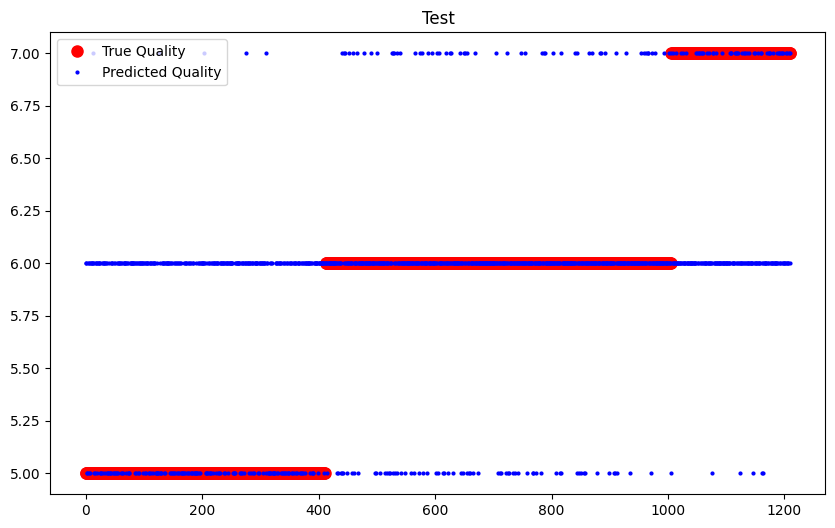

In [26]:
# TODO 7-2.1
y_test = mlp.predict(X_test)


# TODO 7-2.2
sorted_idx = np.argsort(t_test)


# TODO 7-2.3
plt.figure(figsize=(10, 6))
plt.plot(np.array(t_test)[sorted_idx], 'o', color='red', label='True Quality', markersize=8)
plt.plot(y_test[sorted_idx], '.', color='blue', label='Predicted Quality', markersize=4)
plt.title('Test')
plt.legend()
plt.show()

## Hyper Parameter Search

### TODO 8-1 (5 points)

1. Explore various parameters of MLPClassifier like activation functions, alpha, sizes of different hidden layers, etc. and perform hyperparameter search on them to find the best parameters using GridSearchCV.
  - Hint: You can refer to Lab-5 to complete this TODO.

2. Store the best parameters in `best_params` and print them.

Hint: You can go through the documentation of MLPClassifer present on the official website of scikit-learn to get the values of different parameters.


In [28]:
import warnings
warnings.filterwarnings('ignore')

# Create instance of MLPClassifier
from sklearn.neural_network import MLPClassifier
mlpclassifier = MLPClassifier()
from sklearn.model_selection import GridSearchCV

# TODO 8-1
parameter_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01]
}


mlpclassifier = MLPClassifier(max_iter=300)

gridsearch = GridSearchCV(estimator=mlpclassifier, param_grid=parameter_grid, n_jobs=-1, cv=3)

gridsearch.fit(X_train, t_train)


best_params = gridsearch.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}


### TODO 8-2 (5 points)

Using the best parameters that you got in TODO 8-1, modify the code you've written in TODO 7-1 to use these best parameters. Print the train and test scores that you achieved with the new parameters.

In [29]:
# TODO 8-2
best_mlp = MLPClassifier(
    activation='tanh',
    alpha=0.001,
    hidden_layer_sizes=(50,),
    learning_rate_init=0.001,
    solver='adam',
    max_iter=300,
    random_state=42
)

best_mlp.fit(X_train, t_train)

train_score = best_mlp.score(X_train, t_train)
test_score = best_mlp.score(X_test, t_test)

print("Train Accuracy: {}, Test Accuracy: {}".format(train_score, test_score))

Train Accuracy: 0.5828170177612557, Test Accuracy: 0.5656482246077622


# Regression using Multi-Layer Perceptron:

## Dataset:

Here, we will play with the [1985 Automobile Data Set](https://archive.ics.uci.edu/dataset/10/automobile) in [UCI Data Repository](https://archive.ics.uci.edu/ml/index.html).
You can get the csv file directly from [data.csv](https://archive.ics.uci.edu/static/public/10/data.csv).
You do not need to download the names file but you can read it to get informed about the data.

### TODO 9 (2 points)

We are repeating what we did last week, loading data using pandas.

1. Load the data file into variable `df_auto` using pandas library.
2. Print out the dataframe `df_auto`.

In [30]:
# TODO 9:
from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)
df_auto = pd.DataFrame(automobile.data.features)
df_auto['symboling'] = automobile.data.targets

df_auto

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


## Preprocessing

### TODO 10 (10 points)

Preprocess the data by checking for the presence of any null values, strings, etc.
  - Hint: You can refer to the previous labs to get various ideas on how we preprocessed different types of data. You are free to use any preprocessing techniques of your choice. Make sure that the preprocessed data doesn't have any missing values and strings in it.

In [31]:
# TODO 10
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#null values
df_auto.dropna(subset=['price'], inplace=True)

for col in ['peak-rpm', 'horsepower']:
    df_auto[col] = df_auto[col].fillna(df_auto[col].median())

for col in ['stroke', 'bore']:
    df_auto[col] = df_auto[col].fillna(df_auto[col].mean())

df_auto['num-of-doors'] = df_auto['num-of-doors'].fillna(df_auto['num-of-doors'].mode()[0])

df_auto.drop(columns=['normalized-losses'], inplace=True)

print("Null values in each column:")
print(df_auto.isnull().sum())


df_auto.head()

Null values in each column:
price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
symboling            0
dtype: int64


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,2


## Data Partitioning

Let us prepare train and test data first.


### TODO11 (5 points)

1. Partition `df_auto` and store to `X_train`, `X_test`, `t_train`, and `t_test`. The target column is 'symboling'.

  * Note the target label we classify is `symboling`. **Be sure not to include the label in the input!**

In [32]:
# TODO 11
from sklearn.model_selection import train_test_split

X = df_auto.drop('symboling', axis=1)
t = df_auto['symboling']

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)

print("Train data shape: {}".format(X_train.shape))
print("Train target shape: {}".format(t_train.shape))
print("Test data shape: {}".format(X_test.shape))
print("Test target shape: {}".format(t_test.shape))

Train data shape: (160, 24)
Train target shape: (160,)
Test data shape: (41, 24)
Test target shape: (41,)


## Regression using MLP

### TODO 12-1 (7 points)

1. Normalize `X_train` and `X_test` using `StandardScaler` and store them into `X_train_scaled` and `X_test_scaled`.

2. Create an MLPClassifier with 2 hidden layers with 50, 50 neurons. Set the iterations to 500. Store the model into `mlp_reg`
2. Train the model using  `X_train_scaled` and `t_train`
3. Compute the train and test scores and store them in `train_score` and `test_score` respectively.

In [33]:
# Add necessary imports

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline


categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


pipeline = make_pipeline(
    preprocessor,
    MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
)


pipeline.fit(X_train, t_train)



# TODO 12-1.4
train_score = pipeline.score(X_train, t_train)
test_score = pipeline.score(X_test, t_test)


print("Train Accuracy: {:.2f}, Test Accuracy: {:.2f}".format(train_score, test_score))

Train Accuracy: 0.99, Test Accuracy: 0.76


### TODO 12-2 (7 points)

1. Call `predict()` method to make predictions for `X_test_scaled` input and store the results to `y`.  
2. Plot `t_test` (x-axis) against `y` (y-axis).
3. Based on your plot and results, briefly state what you think/observe.


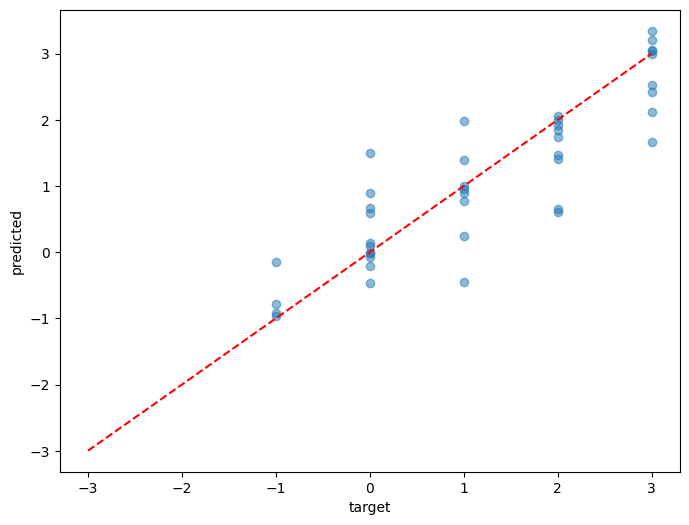

In [34]:
# TODO 12-2:

## TODO 1. make a prediction
y = pipeline.predict(X_test)


## TODO 2. plot t_text vs y
plt.figure(figsize=(8, 6))
plt.scatter(t_test, y, alpha=0.5)

# dashed diagonal line
plt.plot([-3,3], [-3,3], 'r--')
# x and y labels
plt.xlabel("target")
plt.ylabel("predicted")
plt.show()

Write your thoughts about the results and plots in the below cell.


`ANSWER:` The model is decently predicting the target variable, as most predicted values are close to the line. The higher veriables does have some some more errors tho


## Hyper Parameter Search

### TODO 13-1 (5 points)

1. Similar to TODO 8, explore various parameters of MLPRegressor like activation function, learning rate, sizes of various hidden layers, iteration count, etc. and perform hyperparameter search on them to find the best parameters using GridSearchCV.
  - Hint: You can refer to Lab-5 to complete this TODO.

2. Store the best parameters in `best_params` and print them.

Hint: You can go through the documentation of MLPRegressor present on the official website of scikit-learn to get the values of different parameters.


In [35]:
import warnings
warnings.filterwarnings('ignore')

# Create instance of MLPClassifier
from sklearn.model_selection import GridSearchCV

# TODO 13-1
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'mlpregressor__activation': ['tanh', 'relu'],
    'mlpregressor__solver': ['sgd', 'adam'],
    'mlpregressor__alpha': [0.0001, 0.001, 0.01],
    'mlpregressor__learning_rate_init': [0.001, 0.01],
}

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, n_jobs=-1, cv=3, scoring='r2')
gridsearch.fit(X_train, t_train)
best_params = gridsearch.best_params_

print("Best parameters found: ", best_params)

Best parameters found:  {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': 0.001, 'mlpregressor__hidden_layer_sizes': (100, 100), 'mlpregressor__learning_rate_init': 0.01, 'mlpregressor__solver': 'sgd'}


### TODO 13-2 (5 points)

Using the best parameters that you got in TODO 13-1, modify the code you've written in TODO 12-1 to use these best parameters. Print the train and test scores that you achieved with the new parameters.

**Note: You do not have implement data standardization here again!**

**Instead, you can use the scaled training and testing data directly for this TODO**

In [37]:
# TODO 13-2
from sklearn.pipeline import make_pipeline

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


best_pipeline = make_pipeline(
    preprocessor,
    MLPRegressor(
        activation='relu',
        alpha=0.001,
        hidden_layer_sizes=(100, 100),
        learning_rate_init=0.01,
        solver='sgd',
        max_iter=500,
        random_state=42
    )
)

best_pipeline.fit(X_train, t_train)

train_score = best_pipeline.score(X_train, t_train)
test_score = best_pipeline.score(X_test, t_test)

print("Train Accuracy: {:.2f}, Test Accuracy: {:.2f}".format(train_score, test_score))

Train Accuracy: 0.99, Test Accuracy: 0.77


# Feedback (3 points)

Did you enjoy the lab?

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!

* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?


`ANSWER`  3

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?

`ANSWER`  TODO 12 was fairly difficult to do because mpfi was a string and I couldnt compare it to float and  the scaer couldnt process strings or categorical data and I had to use a  ColumnTransformer to handle different data types separately and i used a OneHotEncoder for catagorial features and scaler for the numeric features

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER`